# Scientific Computing  
# Homework Set 5
# Weather Data Part
# Done by Sidy Danioko
   

# First, let's read the data file and see how it look like

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
datafile = pd.read_csv('598354.csv')
datafile['DATE'] = pd.to_datetime((datafile.DATE).apply(str),'%Y%m%d')
datafile


,STATION,STATION_NAME,DATE,MDPR,DAPR,PRCP,TMAX,TMIN,TOBS
0,GHCND:USR0000CTHO,THOMES CREEK CALIFORNIA CA US,2014-01-01,-9999,-9999,-9999,217,83,-9999
1,GHCND:USR0000CTHO,THOMES CREEK CALIFORNIA CA US,2014-01-02,-9999,-9999,-9999,217,72,-9999
2,GHCND:USR0000CTHO,THOMES CREEK CALIFORNIA CA US,2014-01-03,-9999,-9999,-9999,206,78,-9999
3,GHCND:USR0000CTHO,THOMES CREEK CALIFORNIA CA US,2014-01-04,-9999,-9999,-9999,206,94,-9999
4,GHCND:USR0000CTHO,THOMES CREEK CALIFORNIA CA US,2014-01-05,-9999,-9999,-9999,206,100,-9999
5,GHCND:USR0000CTHO,THOMES CREEK CALIFORNIA CA US,2014-01-06,-9999,-9999,-9999,167,89,-9999
6,GHCND:USR0000CTHO,THOMES CREEK CALIFORNIA CA US,2014-01-07,-9999,-9999,-9999,178,61,-9999
7,GHCND:USR0000CTHO,THOMES CREEK CALIFORNIA CA US,2014-01-08,-9999,-9999,-9999,150,56,-9999
8,GHCND:USR0000CTHO,THOMES CREEK CALIFORNIA CA US,2014-01-09,-9999,-9999,-9999,139,33,-9999
9,GHCND:USR0000CTHO,THOMES CREEK CALIFORNIA CA US,2014-01-10,-9999,-9999,-9999,161,39,-9999


# Second, let's see if there is any missing data

For, One should notce that the way our data set is, it will be very difficult to know whteher or not  there is a missing data since pandas would not know that -9999 means that missing data. Therefore, we need to find another way to see if we have missing data

In [2]:
pd.isnull(datafile) 

,STATION,STATION_NAME,DATE,MDPR,DAPR,PRCP,TMAX,TMIN,TOBS
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


### For the sake of conformity, let's define a function that will help us convert any -9999 to the pandas Nan

In [3]:
# For, let's define a function that will help us convert any -9999 to the pandas Nan
def myNull(x):
    if x == -9999:
        return np.nan
    else:
        return x
    
data = datafile.applymap(myNull)
data

,STATION,STATION_NAME,DATE,MDPR,DAPR,PRCP,TMAX,TMIN,TOBS
0,GHCND:USR0000CTHO,THOMES CREEK CALIFORNIA CA US,2014-01-01,NaN,NaN,NaN,217,83,NaN
1,GHCND:USR0000CTHO,THOMES CREEK CALIFORNIA CA US,2014-01-02,NaN,NaN,NaN,217,72,NaN
2,GHCND:USR0000CTHO,THOMES CREEK CALIFORNIA CA US,2014-01-03,NaN,NaN,NaN,206,78,NaN
3,GHCND:USR0000CTHO,THOMES CREEK CALIFORNIA CA US,2014-01-04,NaN,NaN,NaN,206,94,NaN
4,GHCND:USR0000CTHO,THOMES CREEK CALIFORNIA CA US,2014-01-05,NaN,NaN,NaN,206,100,NaN
5,GHCND:USR0000CTHO,THOMES CREEK CALIFORNIA CA US,2014-01-06,NaN,NaN,NaN,167,89,NaN
6,GHCND:USR0000CTHO,THOMES CREEK CALIFORNIA CA US,2014-01-07,NaN,NaN,NaN,178,61,NaN
7,GHCND:USR0000CTHO,THOMES CREEK CALIFORNIA CA US,2014-01-08,NaN,NaN,NaN,150,56,NaN
8,GHCND:USR0000CTHO,THOMES CREEK CALIFORNIA CA US,2014-01-09,NaN,NaN,NaN,139,33,NaN
9,GHCND:USR0000CTHO,THOMES CREEK CALIFORNIA CA US,2014-01-10,NaN,NaN,NaN,161,39,NaN


# Third,  let's get a better understanding of our data set. 

 ### Display a summarize/description of our data

In [4]:
data_description = data.describe() 
data_description

,MDPR,DAPR,PRCP,TMAX,TMIN,TOBS
count,725.000000,725.000000,477828.000000,368249.000000,366526.000000,128327.000000
mean,123.642759,3.383448,15.579809,229.726587,92.067029,143.287032
std,265.038808,2.609323,75.262405,92.185391,76.124425,106.334510
min,0.000000,2.000000,0.000000,-994.000000,-994.000000,-994.000000
25%,0.000000,2.000000,0.000000,172.000000,44.000000,78.000000
50%,0.000000,3.000000,0.000000,228.000000,94.000000,144.000000
75%,122.000000,3.000000,0.000000,294.000000,139.000000,211.000000
max,2543.000000,30.000000,12344.000000,650.000000,600.000000,461.000000


As dispalyed above, one can see various summary statistics let's notice that some columns can not be summarized as evidently there is no logical way to summarize them. In this, i am talking about columns that contain string data. Since the Date colum is displayed in string type, the stats for it does not really matter. However, we can quickly see that the average max temp is 229.72 and the average min temp is 92. One can also see that the median Tmax is 228 with the lowest quartile of 172 and the highest quartile of 294. The median  TMIN is 94 with the lowest quartile 44 and the highest quartile 139. Similar analyses could be done with the other attributes.

### let's get another view of the table above

In [5]:
# Let's take the traspose of data_description to better see the summary
data_description.transpose()

,count,mean,std,min,25%,50%,75%,max
MDPR,725,123.642759,265.038808,0,0,0,122,2543
DAPR,725,3.383448,2.609323,2,2,3,3,30
PRCP,477828,15.579809,75.262405,0,0,0,0,12344
TMAX,368249,229.726587,92.185391,-994,172,228,294,650
TMIN,366526,92.067029,76.124425,-994,44,94,139,600
TOBS,128327,143.287032,106.334510,-994,78,144,211,461


One can see that the above two tables are the same. However, in the second we can see that the attributes are in the rows

### Classify the data  by station

In [6]:
select = data.groupby("STATION").size()
select
# To have a better understanding of our data, let's classify it by groups

STATION
GHCND:US1CAAL0001    581
GHCND:US1CAAL0003    605
GHCND:US1CAAL0004    555
GHCND:US1CAAL0006     69
GHCND:US1CAAL0007    559
GHCND:US1CAAL0011    489
GHCND:US1CAAL0012    502
GHCND:US1CAAL0015    154
GHCND:US1CAAL0016    466
GHCND:US1CAAL0017    609
GHCND:US1CAAL0018    458
GHCND:US1CAAL0020    509
GHCND:US1CAAL0022    506
GHCND:US1CAAM0002    238
GHCND:US1CAAM0003    604
GHCND:US1CAAM0004    246
GHCND:US1CAAM0005    466
GHCND:US1CAAM0006    474
GHCND:US1CAAM0009    575
GHCND:US1CAAM0010    388
GHCND:US1CABT0002    610
GHCND:US1CABT0005    567
GHCND:US1CABT0007    400
GHCND:US1CABT0008    561
GHCND:US1CABT0009    334
GHCND:US1CABT0010     11
GHCND:US1CABT0011    168
GHCND:US1CABT0012     89
GHCND:US1CABT0013     82
GHCND:US1CABT0015     75
                    ... 
GHCND:USW00053120    608
GHCND:USW00053121    608
GHCND:USW00053139    605
GHCND:USW00053144    481
GHCND:USW00053150    606
GHCND:USW00053151    606
GHCND:USW00053152    604
GHCND:USW00093107    601
GHCND:USW00093110

### See how many unique stations we have in our data set. 

In [7]:
unique_Stations = data.STATION_NAME.unique()
unique_Stations
#len(unique_Stations)

array(['THOMES CREEK CALIFORNIA CA US', 'TWENTYNINE PALMS CA US',
       'READER RANCH CALIFORNIA CA US', ..., 'NORCO 1.2 S CA US',
       'MOUNT WILSON CBS CA US', 'HOMELAND 1.7 NNE CA US'], dtype=object)

As result, one can notice that we have 1345 unique stations

### Provide an overall profile in terms of the  different variables

In [8]:
another_select = data.groupby("STATION").count() 
another_select
# a common SQL operation will be getting the cound of records in each group throught a dataset

,STATION_NAME,DATE,MDPR,DAPR,PRCP,TMAX,TMIN,TOBS
STATION,,,,,,,,
GHCND:US1CAAL0001,581,581,0,0,581,0,0,0
GHCND:US1CAAL0003,605,605,0,0,605,0,0,0
GHCND:US1CAAL0004,555,555,0,0,555,0,0,0
GHCND:US1CAAL0006,69,69,0,0,69,0,0,0
GHCND:US1CAAL0007,559,559,0,0,559,0,0,0
GHCND:US1CAAL0011,489,489,0,0,489,0,0,0
GHCND:US1CAAL0012,502,502,0,0,502,0,0,0
GHCND:US1CAAL0015,154,154,0,0,154,0,0,0
GHCND:US1CAAL0016,466,466,0,0,466,0,0,0


### Group our data by mean at different and by station

In [9]:
filtered_data = data[data['TMIN']>-150]
#filtered_data
mean_by_station = filtered_data.groupby('STATION').mean()
mean_by_station
mean_by_station.sort('TMAX',ascending = False)


,MDPR,DAPR,PRCP,TMAX,TMIN,TOBS
STATION,,,,,,
GHCND:USC00042319,NaN,NaN,1.384095,350.411168,188.697124,228.164360
GHCND:USC00040924,0,2.5,4.821782,343.413115,154.914754,213.562500
GHCND:USR0000CCAA,NaN,NaN,NaN,343.187755,193.522449,NaN
GHCND:USR0000CBUU,NaN,NaN,NaN,338.088542,178.739583,NaN
GHCND:USW00053139,NaN,NaN,1.039669,335.203306,200.413223,NaN
GHCND:USC00045502,NaN,NaN,0.731419,334.432432,158.572635,291.547619
GHCND:USW00003104,NaN,NaN,0.939145,331.636513,147.251645,NaN
GHCND:USR0000CSQU,NaN,NaN,NaN,327.849180,192.267213,NaN
GHCND:USW00093138,NaN,NaN,1.907895,327.741776,182.738487,NaN


Above, we are tried to filter our data. The main reason for this is to avoid as many outliers as possible so that our analysis could smoothly done. For, we use the threshold -150, since the cooldest temeperature on earth on the past few years has been around -136F. From that we will choose 3 stations that seem to be important to us¶

# Fourth,  let's conduct a study of the TMAX and the TMIN of the first three stations as displayed above

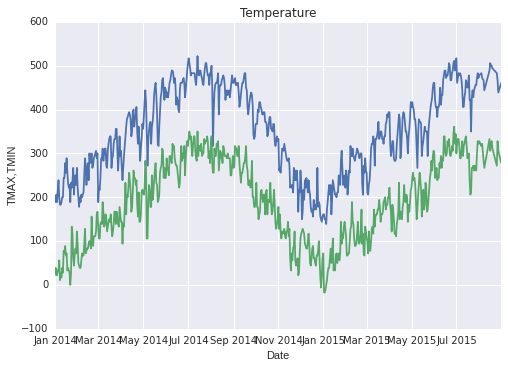

In [20]:
stat1 = filtered_data[filtered_data.STATION == 'GHCND:USC00042319']
stat1
plt.plot(stat1['DATE'],stat1['TMAX'])
plt.plot(stat1['DATE'],stat1['TMIN'])
plt.xlabel('Date')
plt.ylabel('TMAX,TMIN')
plt.title('Temperature')


As shown above, we have the plot of the maximum and minimal temperature at 'GHCND:USC00042319' over the given period.  One can see at this station, the max and min temp assume a quasi-sinusoidal motion where they both reach their local maximum and minimum values at the same time

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9abf459790>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f9ac91b8c50>]], dtype=object)

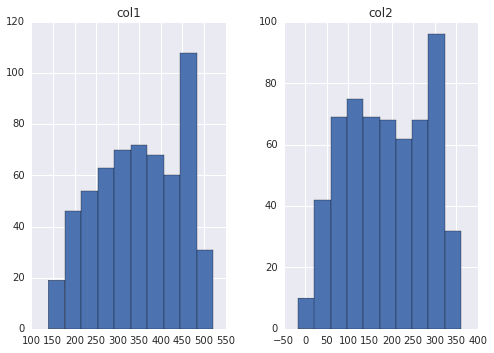

In [18]:
df =pd.DataFrame({'col1': stat1.TMAX,'col2': stat1.TMIN})
df.hist(layout=(1,2))

Above we can find the histograms of maximum and minimum temperatures. On the left graph we can a quasi-normally distributed graph, with the tallest clusters of bars is seen in the group 450-500. This tells us the range in which the most common maximum temperature
is found. 

On the right hand side graph, we can notice that the peak is located in a different group. Parallel to that, we can see that the frequency of maximum temperatures at this station is higher than that of the minimum ones.

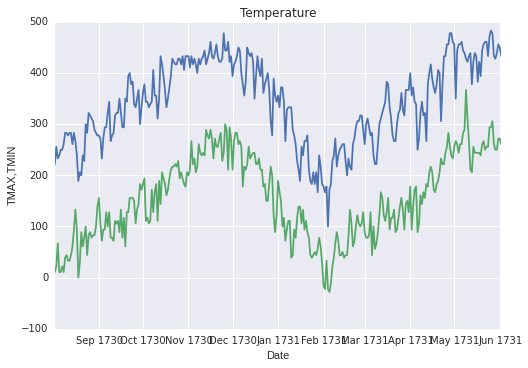

In [21]:
stat2 = filtered_data[filtered_data.STATION == 'GHCND:USC00040924']
mm = stat2.TMAX
mmm = stat2.TMIN
mm.plot()
mmm.plot()
plt.plot(stat2['DATE'],stat2['TMAX'])
plt.plot(stat2['DATE'],stat2['TMIN'])
plt.xlabel('Date')
plt.ylabel('TMAX,TMIN')
plt.title('Temperature')

As displayed above, we have the plot of the max and min temperature over a given period at the station 'GHCND:USC00040924' . We can see that the same features as in the station 'GHCND:USC00042319'. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9abfd6ca10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f9abfc3d650>]], dtype=object)

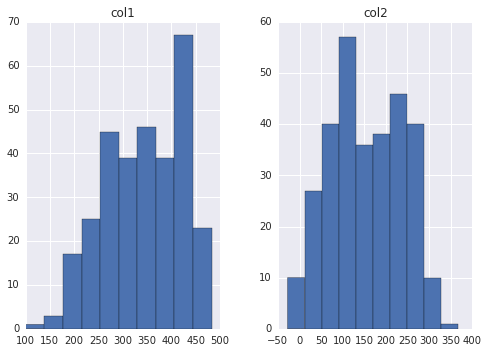

In [22]:
df =pd.DataFrame({'col1': mm,'col2': mmm})
df.hist(layout=(1,2))

Above we can find the histograms of maximum and minimum temperatures. On the left graph we can see a noisy distributed graph, with the tallest clusters of bars is seen in the group 400-450. This tells us the range in which the most common maximum temperature
is found.

On the right hand side graph, we can notice that the peak is located in a different group. Parallel to that, we can see that the frequency of maximum temperatures at this station is very close to that of the minimum ones.


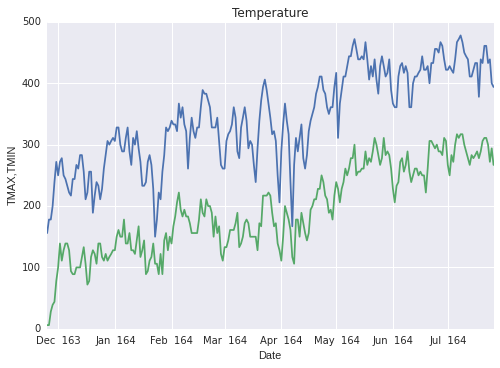

In [23]:
stat3 = filtered_data[filtered_data.STATION == 'GHCND:USR0000CCAA']
pp = stat3.TMAX
ppp = stat3.TMIN
pp.plot()
ppp.plot()
plt.plot(stat3['DATE'],stat3['TMAX'])
plt.plot(stat3['DATE'],stat3['TMIN'])
plt.xlabel('Date')
plt.ylabel('TMAX,TMIN')
plt.title('Temperature')

The above plot shows the max and min temperatures at the station 'GHCND:USR0000CCAA'. Despite an up and down feature in the two graphs, we can notice an increasing trend, small be it, in the two graphs.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9abfaee490>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f9abf95fa50>]], dtype=object)

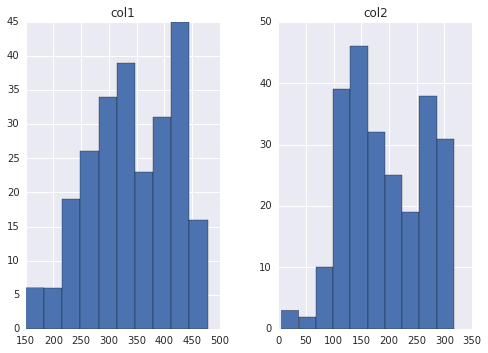

In [24]:
df =pd.DataFrame({'col1': pp,'col2': ppp})
df.hist(layout=(1,2))

Above we can find the histograms of maximum and minimum temperatures. On the left graph we can see a noisy distributed graph, with the tallest clusters of bars is seen in the group 400-450. This tells us the range in which the most common maximum temperature
is found.

On the right hand side graph, we can notice that the peak is located in a different group. Parallel to that, we can see that the frequency of maximum temperatures at this station is very close to that of the minimum ones.

# Fifth, let's plot the recodring rainfall only in the month of june 2015

### a- let's work on station 'GHCND:USC00042319'

In [28]:
data_at_GHCNDUSC00042319 = data[data.STATION == 'GHCND:USC00042319']
#a_filtered
filtered_by_Precipitation1 = data_at_GHCNDUSC00042319[(data_at_GHCNDUSC00042319.PRCP > 0)]
filtered_by_Precipitation1
filtered_inJune= filtered_by_Precipitation1[(filtered_by_Precipitation1.DATE >= 20150601) & (filtered_by_Precipitation1.DATE <=20150630)]
filtered_inJune


,STATION,STATION_NAME,DATE,MDPR,DAPR,PRCP,TMAX,TMIN,TOBS


### b- let's work on 'GHCND:USC00040924'

In [33]:
data_at_GHCNDUSC00040924 = data[data.STATION == 'GHCND:USC00040924']
#a_filtered2
filtered_by_Precipitation2 =data_at_GHCNDUSC00040924[(data_at_GHCNDUSC00040924.PRCP > 0)]
filtered_by_Precipitation2
filtered_inJune = filtered_by_Precipitation2[(filtered_by_Precipitation2.DATE >= 20150601) & (filtered_by_Precipitation2.DATE <=20150630)]
filtered_inJune


,STATION,STATION_NAME,DATE,MDPR,DAPR,PRCP,TMAX,TMIN,TOBS


### c- let's work on 'GHCND:USR0000CCAA'

In [39]:
data_at_GHCNDUSR0000CCAA = data[data.STATION == 'GHCND:USR0000CCAA']
#a_filtered
filtered_by_Precipitation3 = data_at_GHCNDUSR0000CCAA[(data_at_GHCNDUSR0000CCAA.PRCP > 0)]
filtered_by_Precipitation3
filtered_inJune= filtered_by_Precipitation3[(filtered_by_Precipitation3.DATE >= 20150601) & (filtered_by_Precipitation3.DATE <=20150630)]
filtered_inJune


,STATION,STATION_NAME,DATE,MDPR,DAPR,PRCP,TMAX,TMIN,TOBS


We just noticed that no rain fall was registered at the stations GHCND:USC00042319', GHCND:USC00040924 and GHCND:USR0000CCAA. This should not be a big surprise as we are talking about stations located in california